# DataTrianed Practice Project 4

## Abalon Project

### Table of content:
* [Introduction: The Problem](#introduction)
* [Data Exploration and EDA](#data)
* [Analysis](#analysis)

### Introduction: The Problem <a name='introduction'></a>

<p>
    Abalone is a large marine gastropod mollusk. The large sea snail is most often found in the cold waters of New Zealand, Australia, South Africa, Japan, and the west coast of North America. It has extremely rich, flavorful, and highly prized meat that is considered a culinary delicacy. Among the world's most expensive seafood, abalone is often sold live in the shell, frozen, or canned. It is often cut into thick steaks and pan-fried though it can be eaten raw or added to other dishes.
</p>
<p>
    The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. This is a long and tedious task. In this project, our objective is to build a model that can predict the number of rings (and hence the age) of the Abalon.
</p>

In [1]:
#Importing all required packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import joblib

import warnings
warnings.filterwarnings('ignore')

### Data Exploration and EDA <a name='data'></a>

<p>
    Our dataset contains 9 columns out of which the column 'Rings' is our target variable. The next few cells explores the data in details.
</p>

In [2]:
abalonDf = pd.read_csv('abalone.csv')
abalonDf.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalonDf.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


<p>
    From the above table, we can see that there might be outliers present in the columns 'Height', 'Whole weight', 'Shucked weight', 'Shell weight' and 'Rings'. These will be dealt later in the data pre-processing stage.
</p>

In [4]:
abalonDf.shape

(4177, 9)

The dataset has 4177 rows and 9 columns

In [5]:
abalonDf.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no missing values in our data

In [6]:
abalonDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


All the columns in our dataset seems to have the right datatype and hence, does not need any changes.

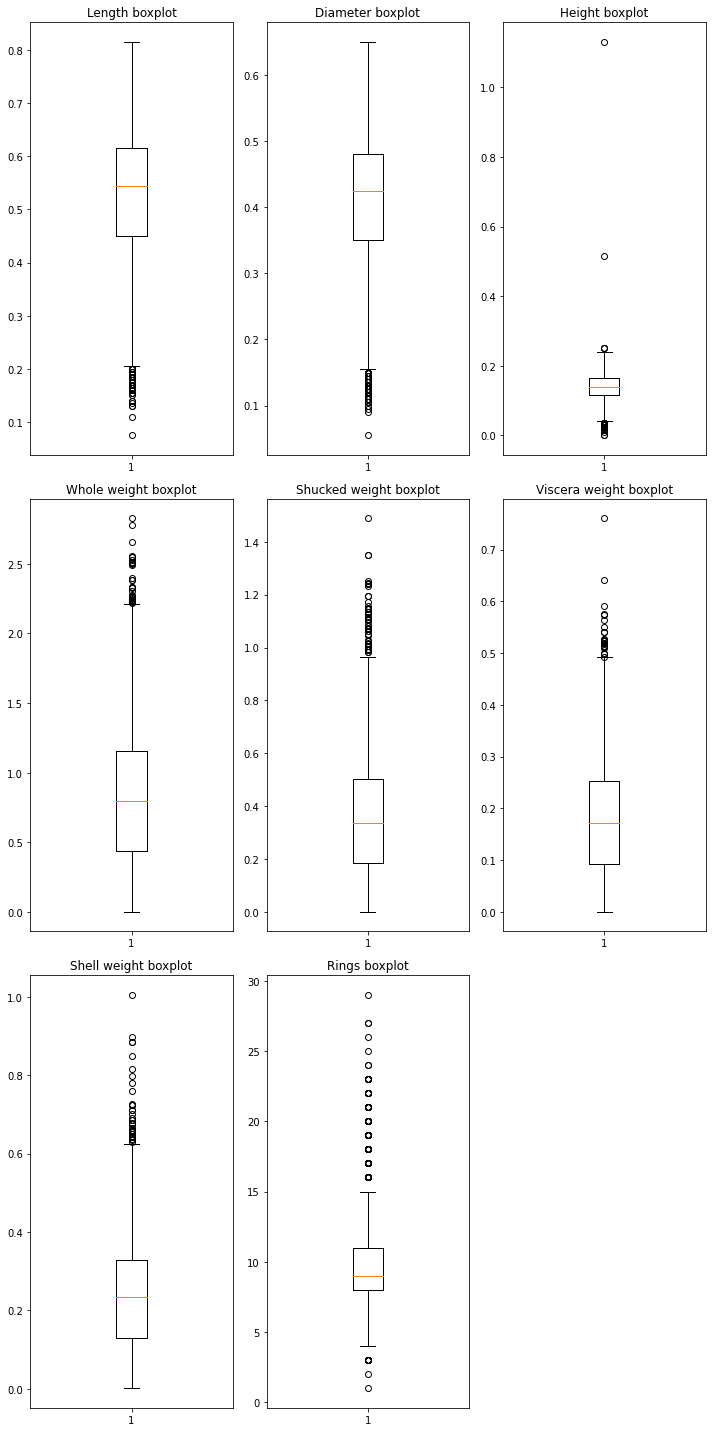

In [7]:
#Continuous variable
continuousVariables = list(abalonDf.drop(['Sex'], axis = 1).columns)
figure = plt.figure(figsize=(10,20))
for index in range(len(continuousVariables)):
    plt.subplot(3,3,index+1)
    plt.boxplot(abalonDf[continuousVariables[index]])
    plt.title(f'{continuousVariables[index]} boxplot')
    plt.tight_layout()
plt.show()

<p>
    We see, from the boxplot above, that almost all the columns have outliers. This might affect the accuary of our model and, therefore, needs to be removed in the data-preprocessing stage.
</p>

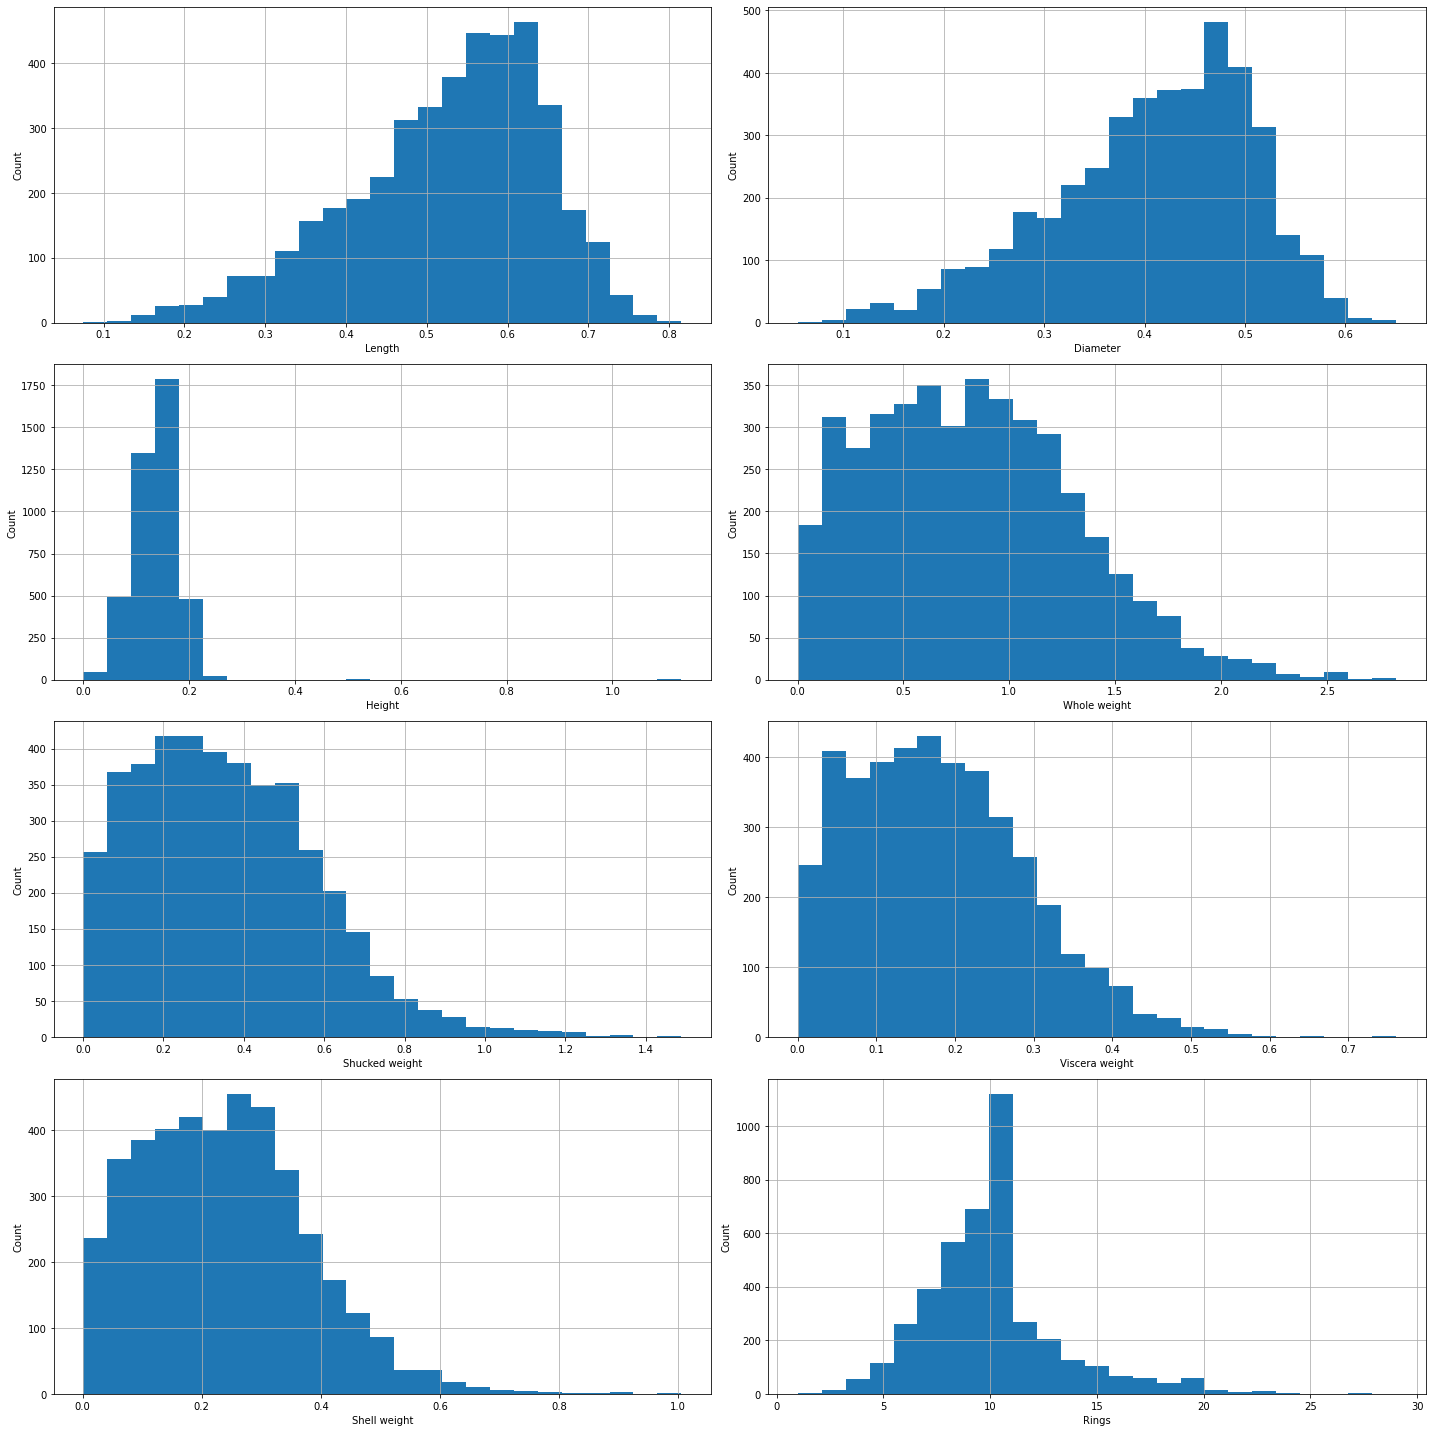

In [8]:
figure = plt.figure(figsize=(20,20))
for index in range(len(continuousVariables)):
    plt.subplot(4,2, index+1)
    abalonDf[continuousVariables[index]].hist(bins=25)
    plt.xlabel(continuousVariables[index])
    plt.ylabel('Count')
    plt.tight_layout()
plt.show()

The columns 'Length' and 'Diameter' are left-tailed while the rest of the columns are right-tailed. This means that the columns need to be treated to have a normal distribution without any skewness. This will be done in the data pre-processing stage.

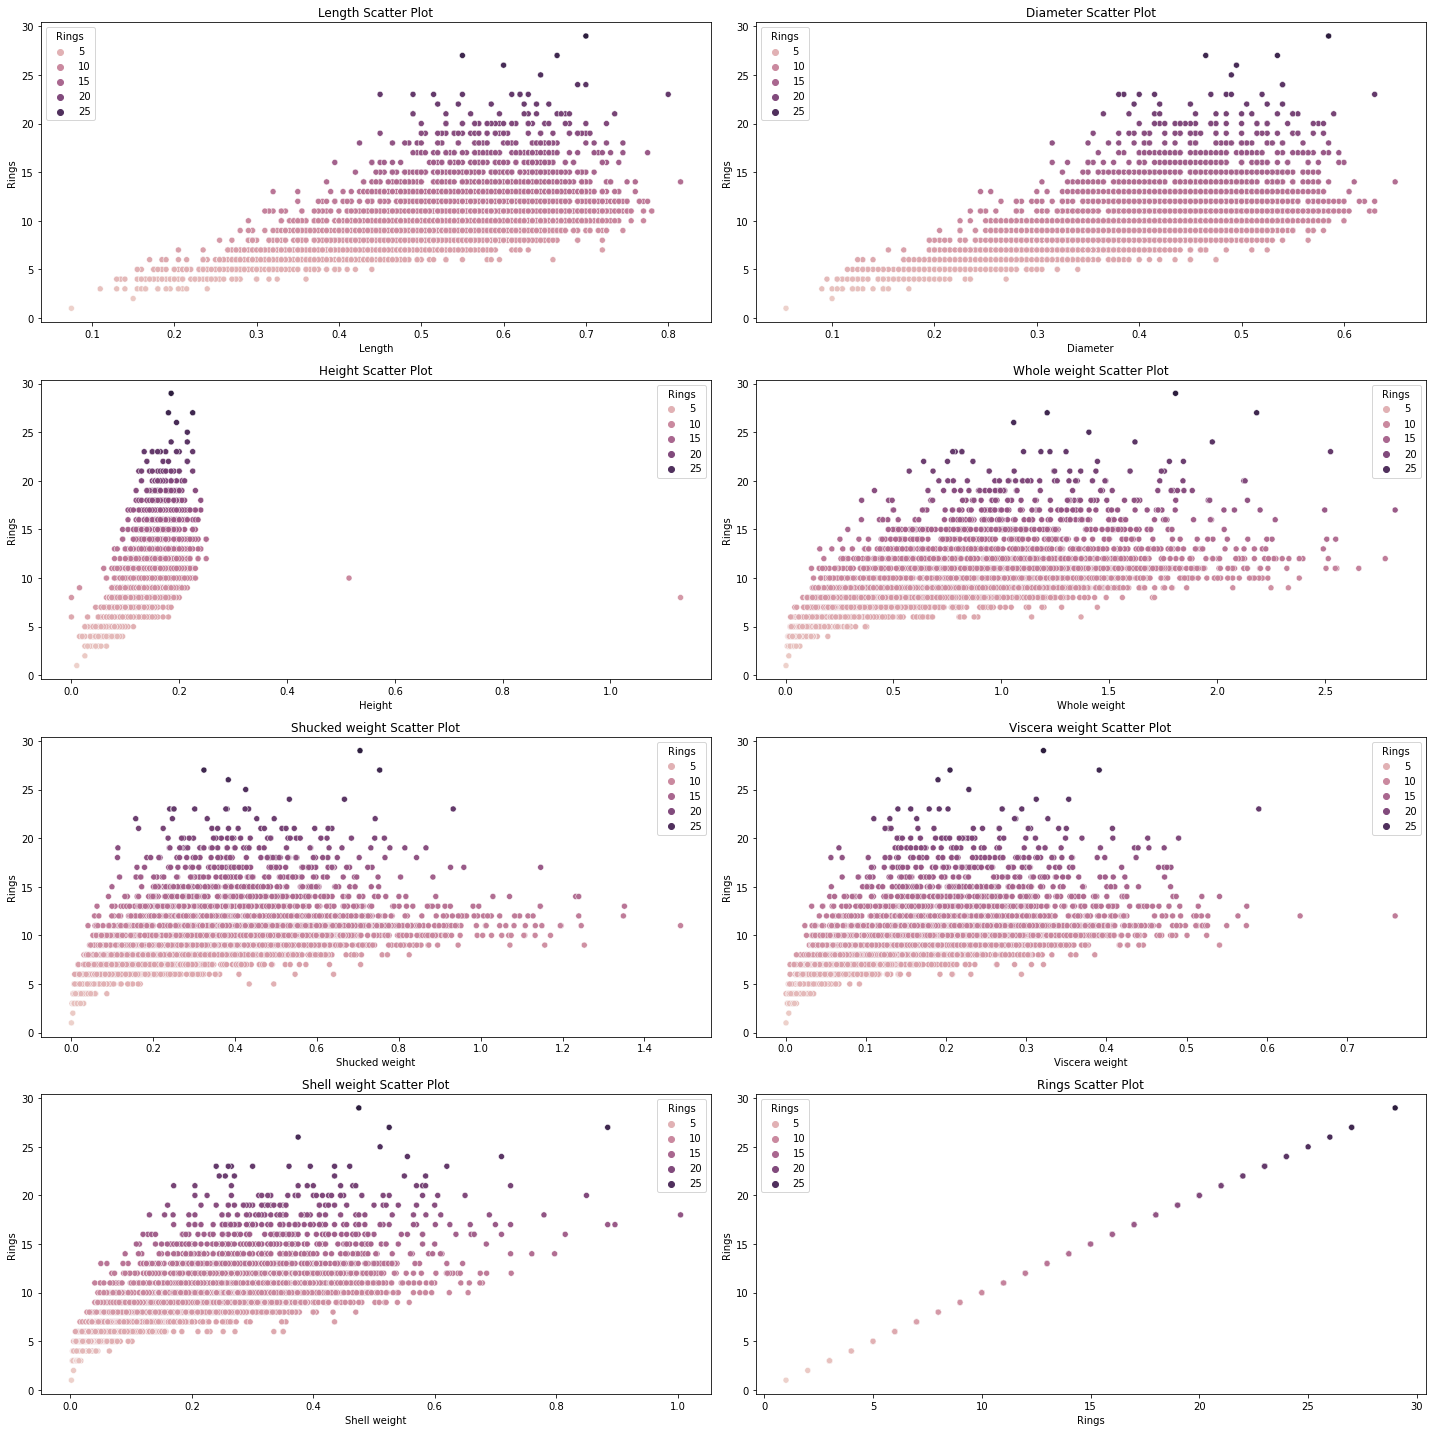

In [9]:
figure = plt.figure(figsize=(20,20))
for index in range(len(continuousVariables)):
    plt.subplot(4,2, index+1)
    sns.scatterplot(abalonDf[continuousVariables[index]], abalonDf['Rings'], hue=abalonDf['Rings'])
    plt.xlabel(continuousVariables[index])
    plt.ylabel('Rings')
    plt.title(f'{continuousVariables[index]} Scatter Plot')
    plt.tight_layout()
plt.show()

<p>
    From the above scatterplots, we see that all the columns are directly proportional to the 'Rings' column, i.e, as the values in the columns increases, the number of rings in the 'Rings' column also increases.
</p>

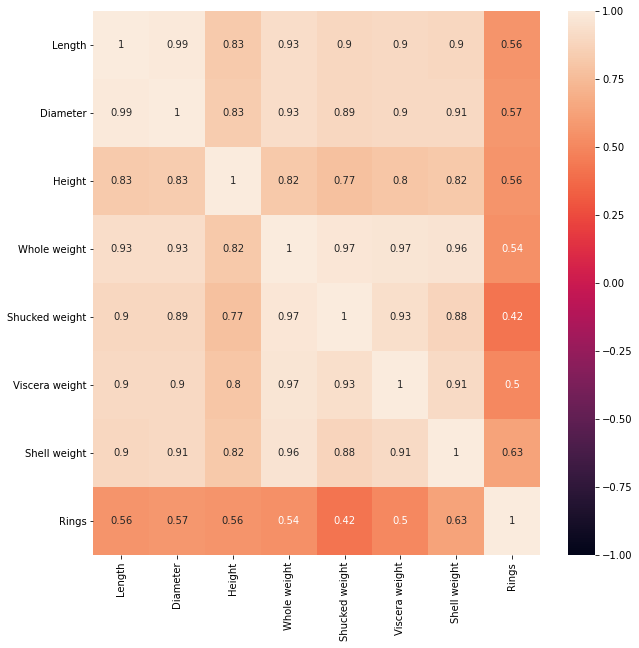

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(abalonDf[continuousVariables].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

From the heatmap we see that all the columns are positively correlated with our target variable 'Rings' with the column 'Shell Weight' having the highest correlation of 0.63 and the column 'Shucked weight' having the lowest correlation of 0.42. Not only this, a quick glance over the entire heatmap also reveals that the columns are positively correlated with each other as well.

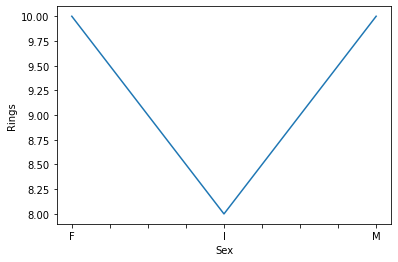

In [11]:
#Categorical variable
abalonDf.groupby('Sex')['Rings'].median().plot()
plt.ylabel('Rings')
plt.show()

The plot above shows median value of 'Rings' with respect to each of the categories in the 'Sex' column. We see that for 'M' and 'F', the median 'Ring' value is around 10 and for that of 'I' is around 8. 

In [12]:
abalonDf['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Each values in the column 'Sex' appears more or less equally and therefore, each of the genders are well represented in the dataset.

### Analysis <a name="analysis"></a>

#### Data Pre-processing

In [13]:
abalonDf = pd.get_dummies(abalonDf, ['Sex'])

In [14]:
z = np.abs(stats.zscore(abalonDf))
threshold = 3

In [15]:
abalonDf_new = abalonDf[(z<3).all(axis=1)]

In [16]:
abalonDf_new.shape[0]

4027

In [17]:
dataLoss = ((abalonDf.shape[0]-abalonDf_new.shape[0])/abalonDf.shape[0])*100
print(f'Removing the outliers resulted in {dataLoss}% data loss')

Removing the outliers resulted in 3.5910940866650707% data loss


In [18]:
#Seperating the x and y
abalonDf_new_x = abalonDf.drop(['Rings'], axis = 1)
abalonDf_new_y = abalonDf.Rings

In [19]:
#Checking the skewness of the continuous columns
abalonDf_new_x.drop(['Sex_M', 'Sex_F', 'Sex_I'], axis = 1).skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

In [20]:
#Removing the skewness of all the continuous columns and re-checking their skewness afterwards
from sklearn.preprocessing import power_transform

x = power_transform(abalonDf_new_x.drop(['Sex_M', 'Sex_F', 'Sex_I'], axis = 1))

abalonDf_new_x_transformed = pd.DataFrame(x, columns= list(abalonDf_new_x.drop(['Sex_M', 'Sex_F', 'Sex_I'], axis = 1)))
abalonDf_new_x_transformed.skew()

Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

In [21]:
#Performing Min-Max scaling
scaler = MinMaxScaler()
scaler.fit(abalonDf_new_x_transformed)

MinMaxScaler()

In [22]:
#Making a new dataframe of all the continuous independent columns after all necessary pre-processing
abalonDf_final_x = pd.DataFrame(scaler.transform(abalonDf_new_x_transformed), columns=abalonDf_new_x_transformed.columns)
abalonDf_final_x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.325838,0.342870,0.197642,0.298907,0.288691,0.247781,0.266809
1,0.204773,0.199152,0.188388,0.144815,0.140316,0.126626,0.132927
2,0.430533,0.438696,0.267742,0.374197,0.322359,0.330768,0.354830
3,0.306799,0.342870,0.250847,0.299876,0.278934,0.275339,0.274518
4,0.184770,0.186740,0.169533,0.132610,0.127120,0.104123,0.105398


In [23]:
#Adding back the categorical columns
catergorical_columns = ['Sex_M', 'Sex_F', 'Sex_I']
for index in catergorical_columns:
    abalonDf_final_x[index] = abalonDf_new_x[index]
abalonDf_final_x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_M,Sex_F,Sex_I
0,0.325838,0.342870,0.197642,0.298907,0.288691,0.247781,0.266809,1,0,0
1,0.204773,0.199152,0.188388,0.144815,0.140316,0.126626,0.132927,1,0,0
2,0.430533,0.438696,0.267742,0.374197,0.322359,0.330768,0.354830,0,1,0
3,0.306799,0.342870,0.250847,0.299876,0.278934,0.275339,0.274518,1,0,0
4,0.184770,0.186740,0.169533,0.132610,0.127120,0.104123,0.105398,0,0,1


#### Model Building

In [24]:
#Finding the best random state
maxAcc = 0
maxRs = 0
for randState in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(abalonDf_final_x, abalonDf_new_y, test_size=0.30, random_state=randState)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    predlr = lr.predict(x_test)
    acc = lr.score(x_test, y_test)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=randState
print(f"Best accuracy is {maxAcc*100}% on Random state {randState}")

Best accuracy is 58.471277584103355% on Random state 199


In [25]:
#Splitting the dataset into test and train sets using the best random_state found above
x_train, x_test, y_train, y_test = train_test_split(abalonDf_final_x, abalonDf_new_y, test_size=0.30, random_state=199)

In [26]:
#Fitting various Regression models and printing there performance scores
lr = LinearRegression()
svr = SVR()
rfr = RandomForestRegressor()
models = [lr, svr, rfr]

for m in models:
    m.fit(x_train, y_train)
    print(f'{m} Scores\n\tScore: {m.score(x_test, y_test)*100}')    

LinearRegression() Scores
	Score: 54.4729352541746
SVR() Scores
	Score: 48.45534933068954
RandomForestRegressor() Scores
	Score: 51.669072450118406


In [27]:
#Cross-validation score for LinearRegression
cvsLr = cross_val_score(lr, abalonDf_final_x, abalonDf_new_y, cv=5)
print(f'Cross Validation score for LinearRegression is {cvsLr.mean()*100}')

Cross Validation score for LinearRegression is 45.03506379772978


In [28]:
#Cross-validation score for Support Vector Regressor
cvsSvr = cross_val_score(svr, abalonDf_final_x, abalonDf_new_y, cv=5)
print(f'Cross Validation score for SVR is {cvsSvr.mean()*100}')

Cross Validation score for SVR is 45.660822170591445


In [29]:
#Cross-validation score for Random Forest Regressor
cvsRfr = cross_val_score(rfr, abalonDf_final_x, abalonDf_new_y, cv=5)
print(f'Cross Validation score for RandomForestRegressor is {cvsRfr.mean()*100}')

Cross Validation score for RandomForestRegressor is 44.382324926889616


<table>
    <thead>
        <tr>
            <th>Regressor</th>
            <th>Score</th>
            <th>Cross Validation Score</th>
            <th>Score Difference</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Linear Regression</td>
            <td>54.47</td>
            <td>45.04</td>
            <td>9.70</td>
        </tr>
        <tr>
            <td style='color:green'>SVR</td>
            <td style='color:green'>48.46</td>
            <td style='color:green'>45.66</td>
            <td style='color:green'>2.80</td>
        </tr>
        <tr>
            <td>Random Forest Regressor</td>
            <td>52.07</td>
            <td>44.29</td>
            <td>7.78</td>
        </tr>


</table>

<p>
    From the table above, we see that SVR has the least difference between the actual score and the cross-validation score. Therefore, we select this as out best model and perform hyper-parameter tuning on it to further increase its score.
</p>

#### Hyper Parameter Tuning 

In [30]:
#Defining the parameters for GridSearchCV
parameters = {'gamma': ['auto'],
             'C': [0.1, 1, 10, 100, 1000]}

In [31]:
#initialising GridSearchCV object
gs = GridSearchCV(svr, param_grid=parameters, cv = 5, n_jobs = -1)

In [32]:
#Fitting GridSearchCV and printing the best combination of parameters
gs.fit(x_train, y_train)
gs.best_params_

{'C': 1000, 'gamma': 'auto'}

In [33]:
#Using the best parameter combination to buid our final model
svr = SVR(C = 1000, gamma = 'auto')

In [34]:
svr.fit(x_train, y_train)
print(f'The final Mean Accuracy is {svr.score(x_test, y_test)*100}')

The final Mean Accuracy is 56.027683307152564


#### Saving the Model

In [35]:
joblib.dump(svr, 'abalon.pkl')

['abalon.pkl']

#### Checking the model

In [36]:
m = joblib.load('abalon.pkl')
pred = m.predict(x_test)
pred

array([11.30191983,  7.99764736, 10.25299736, ..., 10.65737086,
        8.27055144, 10.22883795])